# Chapter 10 - Principal Components Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. It transforms a set of possibly correlated features into a smaller set of linearly uncorrelated features called **principal components**. These components are ordered such that the first few retain most of the variation (information) present in the original data.

#### Key Concepts:
- **Dimensionality Reduction**: PCA reduces the number of variables (features) by projecting the data onto a lower-dimensional space while preserving the most important information.
- **Variance Maximization**: The principal components capture the directions of maximum variance in the data.
- **Orthogonality**: The principal components are orthogonal to each other, meaning they are uncorrelated.
  
#### Applications:
- **Data Visualization**: PCA is often used for visualizing high-dimensional data in 2D or 3D.
- **Noise Reduction**: By keeping only the most significant components, PCA helps in removing noise from the data.
- **Feature Engineering**: PCA can create new features that better represent the underlying structure of the data.

PCA is an essential tool in fields such as machine learning, image processing, and bioinformatics for simplifying complex datasets while preserving their essential characteristics.


In [4]:
x = [.00, .90, 1.80, 2.60, 3.30, 4.40, 5.20, 6.10, 6.50, 7.40]
y = [5.90, 5.40, 4.40, 4.60, 3.50, 3.70, 2.80, 2.80, 2.40, 1.50]

pca_data = pd.DataFrame(x, y)
pca_data

,0
5.9,0.0
5.4,0.9
4.4,1.8
4.6,2.6
3.5,3.3
3.7,4.4
2.8,5.2
2.8,6.1
2.4,6.5
1.5,7.4


In [5]:
import statistics

statistics.variance(x)

6.266222222222223

In [6]:
statistics.variance(y)

1.9133333333333338

The total variance accounted for by variables x and y is therefore equal to the sum of the variances:

In [8]:
total_variance = statistics.variance(x) + statistics.variance(y)
total_variance

8.179555555555556

In [9]:
data = np.array([x, y])
data

array([[0. , 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4],
       [5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5]])

In [10]:
# Covariance matrix
covMatrix = np.cov(data, bias = False)
covMatrix

array([[ 6.26622222, -3.38111111],
       [-3.38111111,  1.91333333]])

We see from the above that **the variance of the first variable is 6.26** while **the variance of the second variable is 1.91**. The **covariance between variables is –3.38** and
appears in the off-diagonal of the matrix. We can also obtain a heatmap of the covariance matrix using seaborn:

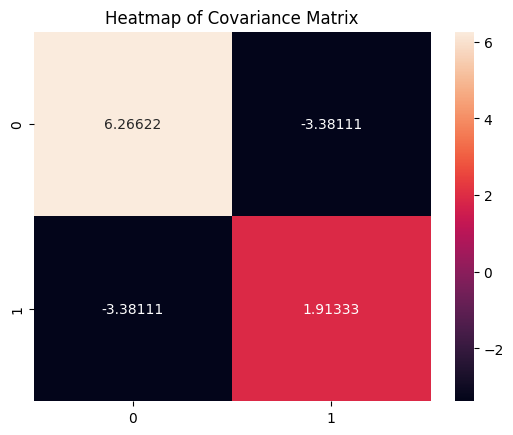

In [12]:
sns.heatmap(covMatrix, annot=True, fmt='g')

plt.title('Heatmap of Covariance Matrix');

    The variance of the first variable is 6.26 
    
    The variance of the second variable is 1.91 
    
    The covariance between variables is –3.38

In [14]:
import numpy.linalg as la

eigenvalue, eigenvector = la.eig(covMatrix)
eigenvalue, eigenvector

(array([8.11082525, 0.06873031]),
 array([[ 0.87785621,  0.47892429],
        [-0.47892429,  0.87785621]]))

### PCA on Correlation Matrix

In [16]:
data = {'x': [0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4],
        'y': [5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5]}

df = pd.DataFrame(data,columns = ['x', 'y'])

corrMatrix = df.corr()

corrMatrix

,x,y
x,1.000000,-0.976475
y,-0.976475,1.000000


In [17]:
eigenvalue, eigenvector = la.eig(corrMatrix)
eigenvalue, eigenvector

(array([1.97647522, 0.02352478]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

### PCA in Python

In [19]:
A = np.array([[5.9, 0.0], [5.4, 0.9], [4.4, 1.8], [4.6, 2.6], [3.5, 3.3], [3.7, 4.4], [2.8, 5.2], [2.8, 6.1], [2.4, 6.5], [1.5, 7.4]])
A

array([[5.9, 0. ],
       [5.4, 0.9],
       [4.4, 1.8],
       [4.6, 2.6],
       [3.5, 3.3],
       [3.7, 4.4],
       [2.8, 5.2],
       [2.8, 6.1],
       [2.4, 6.5],
       [1.5, 7.4]])

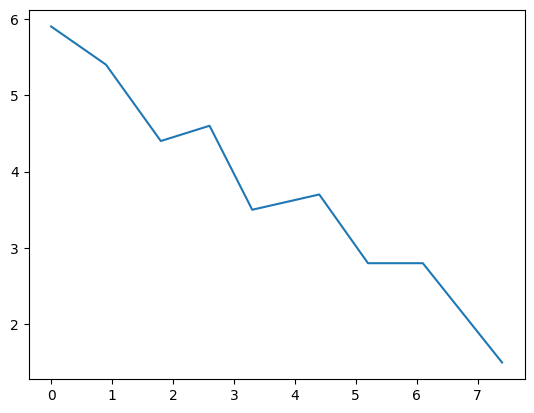

In [20]:
plt.plot(x, y);

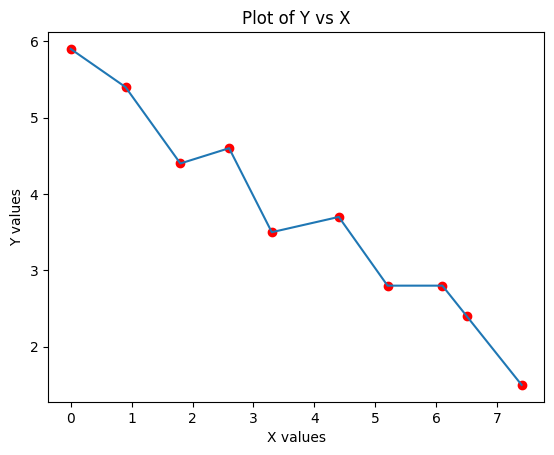

In [21]:
# Data array A
A = np.array([[5.9, 0.0], [5.4, 0.9], [4.4, 1.8], [4.6, 2.6], [3.5, 3.3], 
              [3.7, 4.4], [2.8, 5.2], [2.8, 6.1], [2.4, 6.5], [1.5, 7.4]])

# Extracting x and y values from the array
x = A[:, 1]  # First column (x values)
y = A[:, 0]  # Second column (y values)

# Plotting the line
plt.plot(x, y, label='Line Plot')

# Adding the points from A as scatter points
plt.scatter(x, y, color='red', label='Data Points')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of Y vs X')
plt.show()


In [22]:
from sklearn.decomposition import PCA

pca = PCA(2)  # Initialize PCA with 2 components (dimensionality reduction to 2D)
pca.fit(A)    # Fit the PCA model to the data matrix A, learning the principal components

PCA(n_components=2)

In [23]:
print(pca.components_)

[[-0.47892429  0.87785621]
 [ 0.87785621  0.47892429]]


**Interpretation:** These are the principal components of the data. Each row represents a principal component vector (or eigenvector) that points in the direction of maximum variance for that component.

    The first row corresponds to Component 1.
    The second row corresponds to Component 2.
    
**Explanation:**

For Component 1, the components `-0.47892429` and `0.87785621` indicate how much each of the original variables (x1 and x2) contributes to this principal component. These values are the weights or loadings of the features in the new coordinate system.
For Component 2, the values `0.87785621` and `0.47892429` describe the contributions of the original features to the second principal component.

In [25]:
print(pca.explained_variance_)

[8.11082525 0.06873031]


**Interpretation:** These values represent the variance explained by each principal component. In PCA, we aim to project the data along axes (principal components) that capture the most variance.

    The first value (8.11082525) represents the variance explained by Component 1.
    The second value (0.06873031) represents the variance explained by Component 2.
    
**Explanation:**

Component 1 explains the majority of the variance in the data, with a variance of `8.11`.
Component 2 explains much less variance, with a variance of `0.0687`. This suggests that Component 2 doesn't contribute much to the data's variance, making it less important for understanding the structure of the data.

    Component 1 Proportion of Variance Explained = 8.11 / 8.18 = 0.991
    Component 2 Proportion of Variance Explained = 0.06 / 8.18 = 0.007

    Component 1 explains 99.1% of the total variance, indicating that it is the most important component for representing the data.
    Component 2 explains 0.7% of the total variance, suggesting that it has a very small contribution.

To emphasize our previous point, suppose we had, instead of requesting two components, requested only a single component:

In [29]:
pca = PCA(1)  # Initialize PCA with 1 component (dimensionality reduction to 1D)
pca.fit(A)    # Fit the PCA model to the data matrix A, learning the principal component

PCA(n_components=1)

In [30]:
print(pca.components_)

[[-0.47892429  0.87785621]]


In [31]:
print(pca.explained_variance_)

[8.11082525]


Notice that the request for a single component rather than two does not change
the structure of the first component in terms of its eigenvector; nor does it alter the
proportion of variance explained. 

### Principal Components Analysis on USA Arrests Data

In [34]:
url = ('https://raw.githubusercontent.com/jordaan-c/Unsupervised-Learning-Final-Project/refs/heads/main/UsArrests.csv')

data = pd.read_csv(url)

data.head(10)

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
df = pd.DataFrame(data, columns=['Murder', 'Assault', 'UrbanPop','Rape'])

df.head(10)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [36]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [37]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [38]:
# Total of Variances

total_variances_raw = 18.970465 + 6945.165714 + 209.518776 + 87.729159
total_variances_raw

7261.384114

### Standardized Data

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create an instance of the StandardScaler to standardize the data (mean=0, variance=1)
scaler.fit(df)             # Fit the scaler to the data (compute the mean and standard deviation for each feature)

StandardScaler()

In [41]:
scaled_data = scaler.transform(df)
scaled_data[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [42]:
scaled_data_df = pd.DataFrame(scaled_data, columns = df.columns)

scaled_data_df.head(5)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [43]:
scaled_data_df.mean()

Murder     -7.105427e-17
Assault     1.387779e-16
UrbanPop   -4.396483e-16
Rape        8.593126e-16
dtype: float64

In [44]:
scaled_data_df.var()

Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)  # Initialize the PCA model to reduce the data to 4 principal components
pca.fit(scaled_data_df)    # Fit the PCA model to the scaled data, learning the principal components

PCA(n_components=4)

In [46]:
print(pca.components_)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [-0.6492278   0.74340748 -0.13387773 -0.08902432]]


**Interpretation:** These are the principal components of the data. Each row represents a principal component vector (or eigenvector) that points in the direction of maximum variance for that component.

    The first row corresponds to Component 1.
    The second row corresponds to Component 2.
    the third row corresponds to Component 3.
    The fouth row corresponds to Component 4.

**Explanation:**

For Component 1, the components [0.53589947,  0.58318363,  0.27819087,  0.54343209] indicate how much each of the original variables (x1, x2, x3, x4) contributes to this principal component. These values are the weights or loadings of the features in the new coordinate system.

    First value (0.53589947): This is the weight (loading) of the first feature (e.g., Murder) in the first principal component. A higher absolute value means the feature contributes more to that component.
    
    Second value (0.58318363): This is the weight of the second feature (e.g., Assault) in the first principal component.
    
    Third value (0.27819087): This is the weight of the third feature (e.g., UrbanPop) in the first principal component.
    
    Fourth value (0.54343209): This is the weight of the fourth feature (e.g., Rape) in the first principal component.

In [48]:
# Let's confirm if these components result in a unit vector:

0.53589947**2 + 0.58318363**2 + 0.27819087**2 + 0.54343209**2

0.9999999848393829

The first component is:

    0.53 (Murder) + 0.58 (Assault) + 0.27 (UrbanPop) + 0.54 (Rape)

The second component is:

    - 0.41 (Murder) - 0.18 (Assault) + 0.87 (UrbanPop) + 0.16 (Rape)

In [50]:
print(pca.explained_variance_ratio_)

[0.62006039 0.24744129 0.0891408  0.04335752]


    The first principal component explains approximately 62.01% of the total variance in the dataset.
    The second principal component explains approximately 24.74% of the variance.
    The third principal component explains approximately 8.91% of the variance.
    The fourth principal component explains approximately 4.34% of the variance.

In [52]:
0.62006039 + 0.24744129 + 0.0891408 + 0.04335752

1.0

### PCA with the Raw Data

In [54]:
pca = PCA(n_components=4)
pca.fit(df)               # Raw data

PCA(n_components=4)

In [55]:
pca.components_

array([[ 0.04170432,  0.99522128,  0.04633575,  0.0751555 ],
       [-0.04482166, -0.05876003,  0.97685748,  0.20071807],
       [ 0.07989066, -0.06756974, -0.20054629,  0.97408059],
       [ 0.99492173, -0.0389383 ,  0.05816914, -0.07232502]])

In [56]:
print(pca.explained_variance_)

[7.01111485e+03 2.01992366e+02 4.21126508e+01 6.16424618e+00]


In [57]:
# The total variance of the components

7.01111485*1000 + 2.01992366*100 + 4.21126508*10 + 6.16424618

7261.38411298

In [58]:
# Remember the total variance for raw data

total_variances_raw

7261.384114

### Plotting the Components

In [60]:
from pca import pca
import yellowbrick

We will now first generate plots on the standardized data. To generate these plots, we use the scaled data with no headers

In [62]:
model = pca(n_components=4)       # Initialize PCA with 4 components to reduce the data to 4 principal components
X = scaled_data                   # Use the scaled data (already standardized) as input for the PCA
results = model.fit_transform(X)  # Fit the PCA model to the data and transform the data to the 4 principal components
                                  # The transformed data (principal components) is stored in 'results', each row is a new representation of the data

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [63]:
results  

{'loadings':             1         2         3         4
 PC1  0.535899  0.583184  0.278191  0.543432
 PC2 -0.418181 -0.187986  0.872806  0.167319
 PC3 -0.341233 -0.268148 -0.378016  0.817778
 PC4 -0.649228  0.743407 -0.133878 -0.089024,
 'PC':          PC1       PC2       PC3       PC4
 0   0.985566 -1.133392 -0.444269 -0.156267
 1   1.950138 -1.073213  2.040003  0.438583
 2   1.763164  0.745957  0.054781  0.834653
 3  -0.141420 -1.119797  0.114574  0.182811
 4   2.523980  1.542934  0.598557  0.341996
 5   1.514563  0.987555  1.095007 -0.001465
 6  -1.358647  1.088928 -0.643258  0.118469
 7   0.047709  0.325359 -0.718633  0.881978
 8   3.013042 -0.039229 -0.576829  0.096285
 9   1.639283 -1.278942 -0.342460 -1.076797
 10 -0.912657  1.570460  0.050782 -0.902807
 11 -1.639800 -0.210973  0.259801  0.499104
 12  1.378911  0.681841 -0.677496  0.122021
 13 -0.505461  0.151563  0.228055 -0.424666
 14 -2.253646  0.104054  0.164564 -0.017556
 15 -0.796881  0.270165  0.025553 -0.206496
 16 -0.7

To obtain outlier details:

In [65]:
print(results['outliers'])

     y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0   0.967985  0.638870   6.074649   False       False     1.501972
1   0.688991  0.047379  15.668463   False       False     2.225943
2   0.967985  0.378984   8.579674   False       False     1.914470
3   0.998854  0.905606   3.416060   False       False     1.128692
4   0.688991  0.060578  14.927132   False       False     2.958229
5   0.967985  0.347783   8.935300   False       False     1.808083
6   0.967985  0.476196   7.573534   False       False     1.741174
7   0.998854  0.846749   4.113412   False       False     0.328838
8   0.731892  0.102465  13.283361   False       False     3.013298
9   0.967985  0.204513  10.950617   False       False     2.079169
10  0.967985  0.392822   8.427938   False       False     1.816394
11  0.967985  0.605607   6.372275   False       False     1.653316
12  0.967985  0.583455   6.571802   False       False     1.538279
13  0.998854  0.964900   2.430347   False       False     0.52

[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


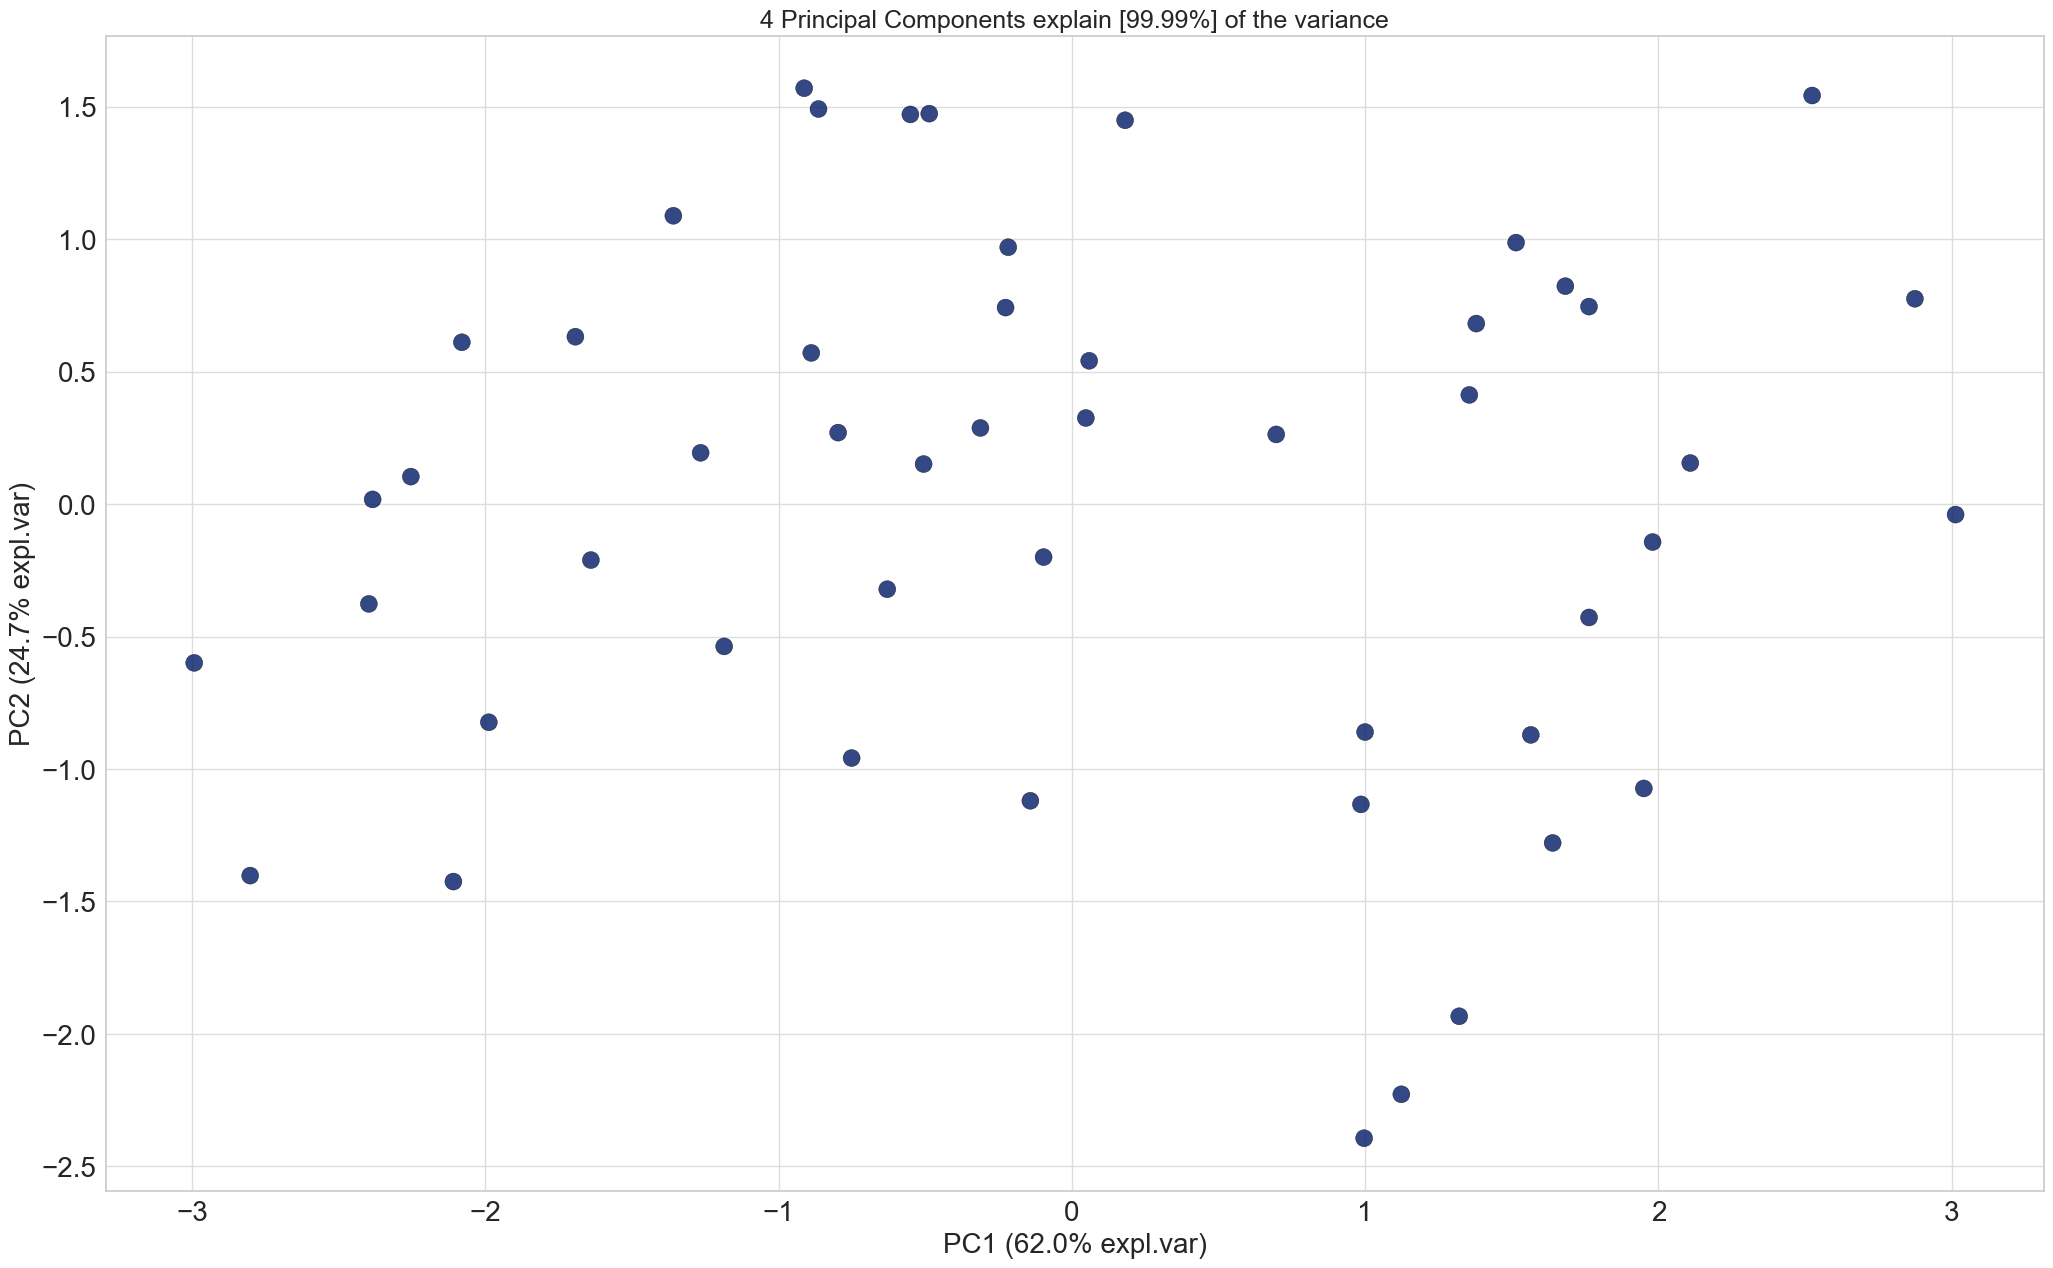

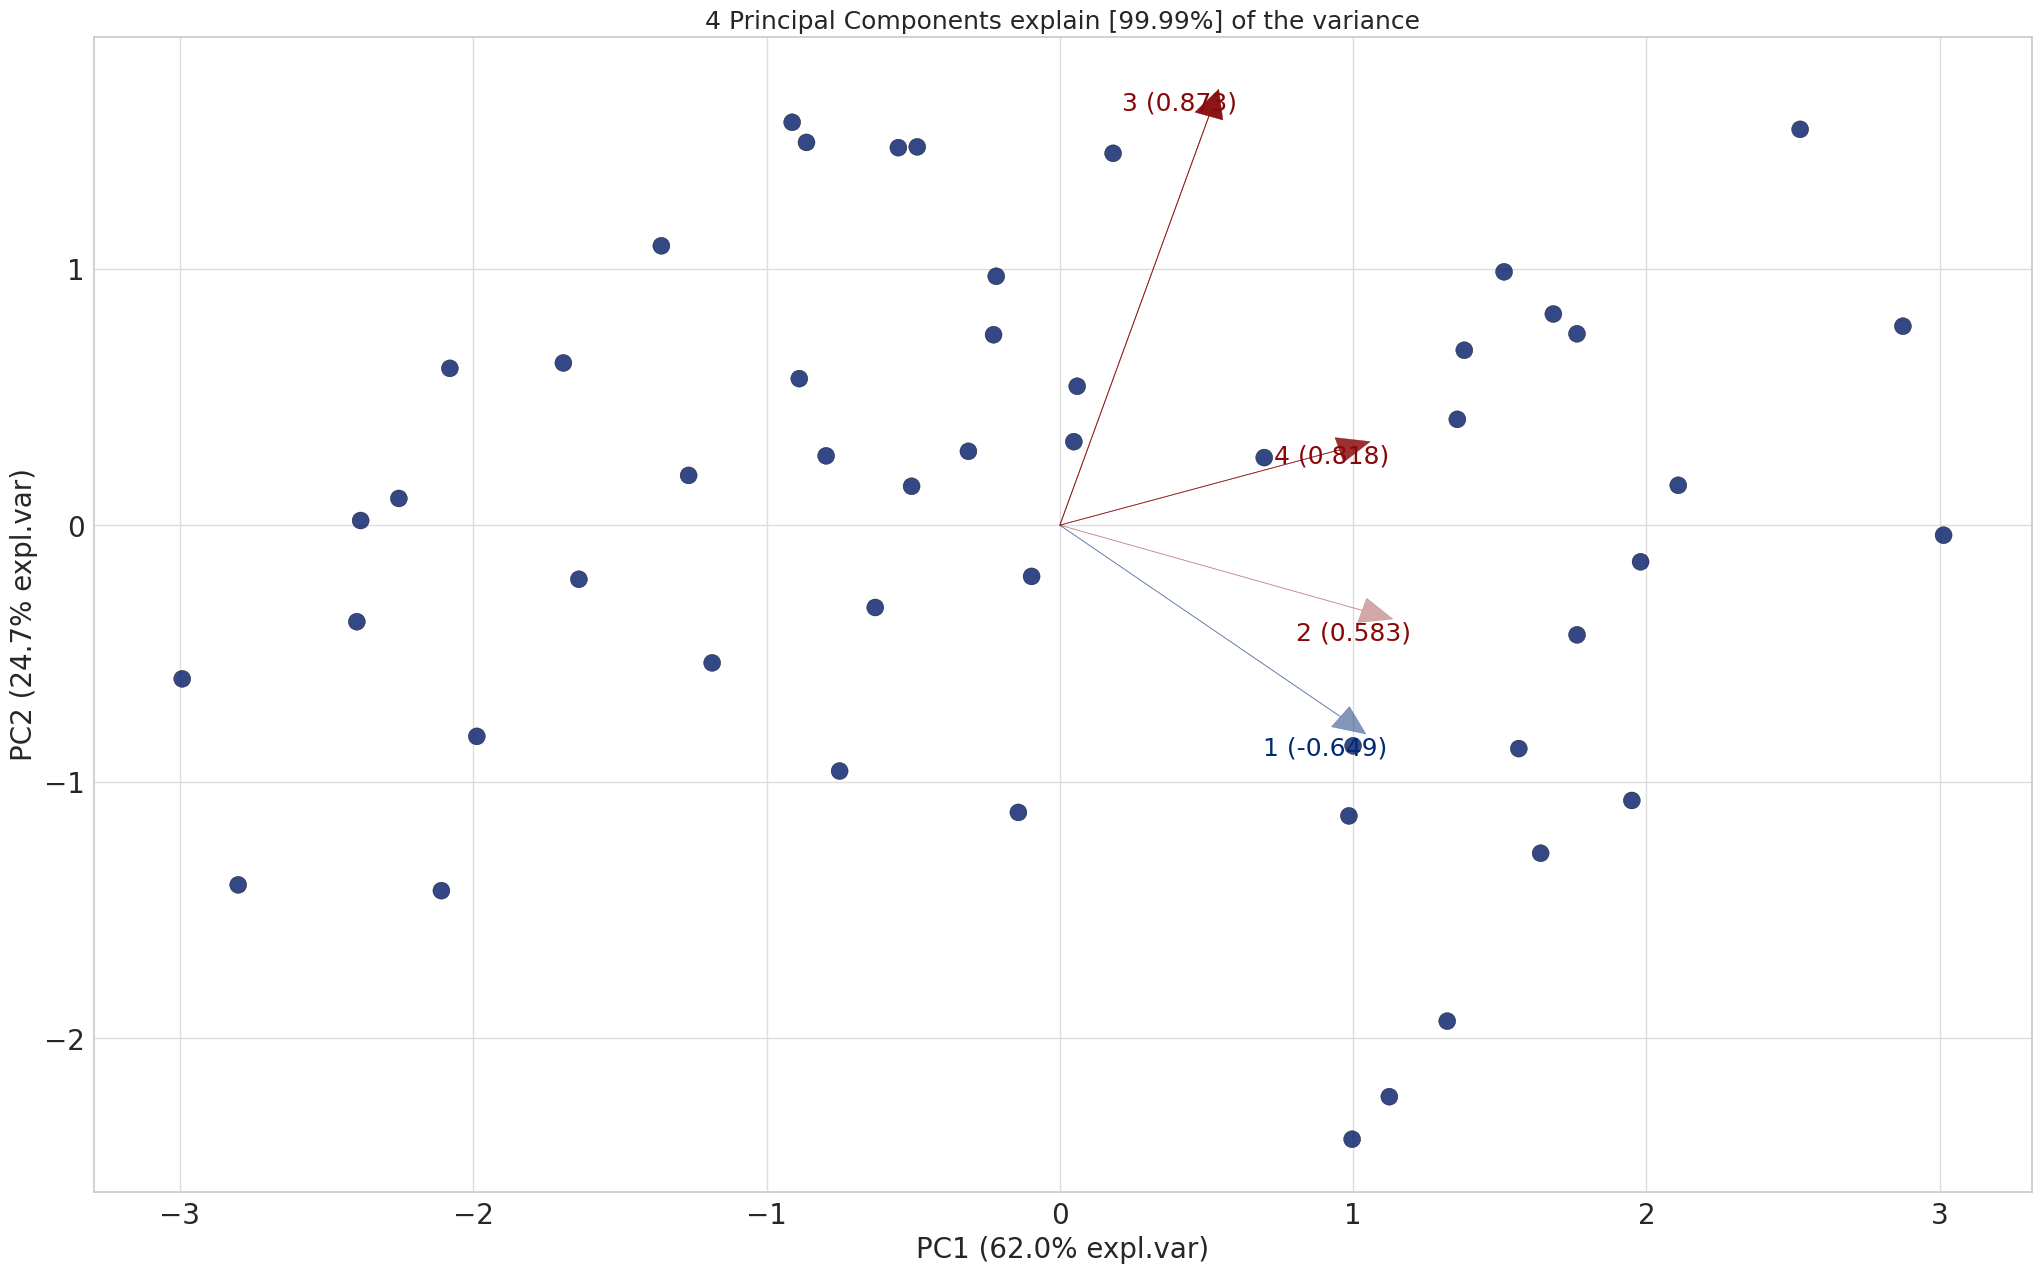

In [66]:
fig, ax = model.scatter()
fig, ax = model.biplot(n_feat=4)

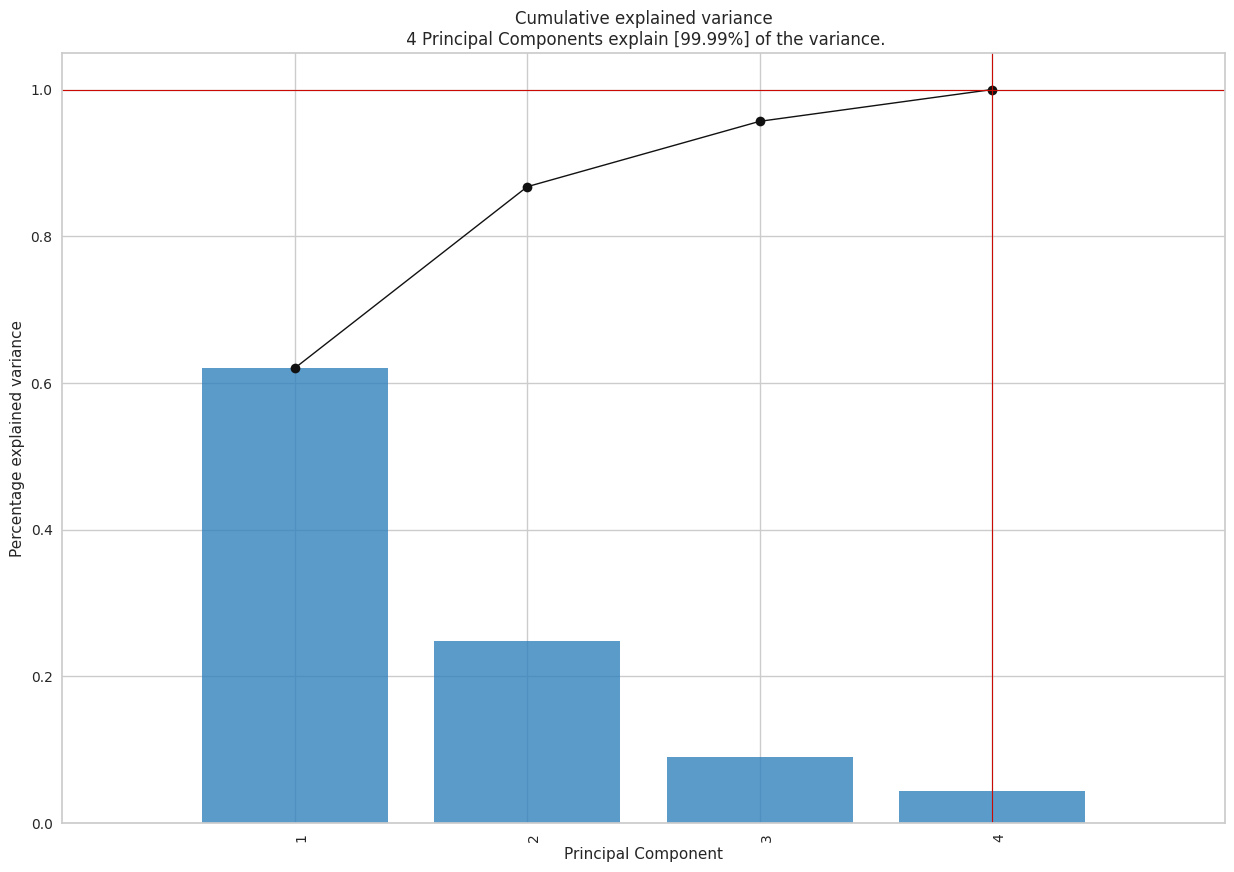

In [67]:
fig, ax = model.plot()

[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


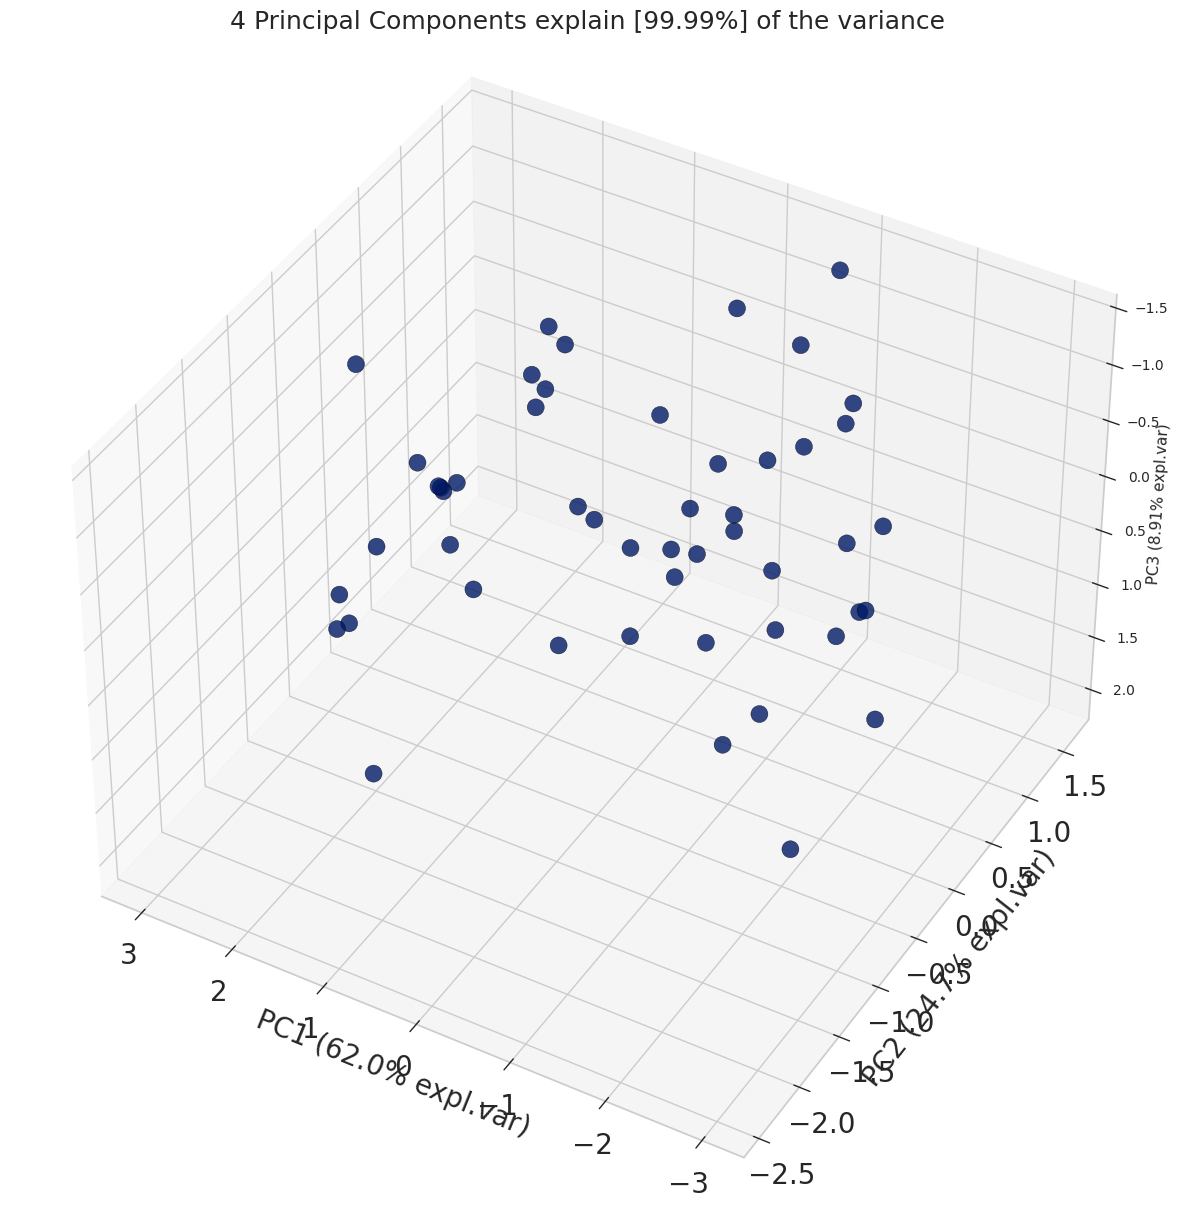

In [68]:
fig, ax = model.scatter3d()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


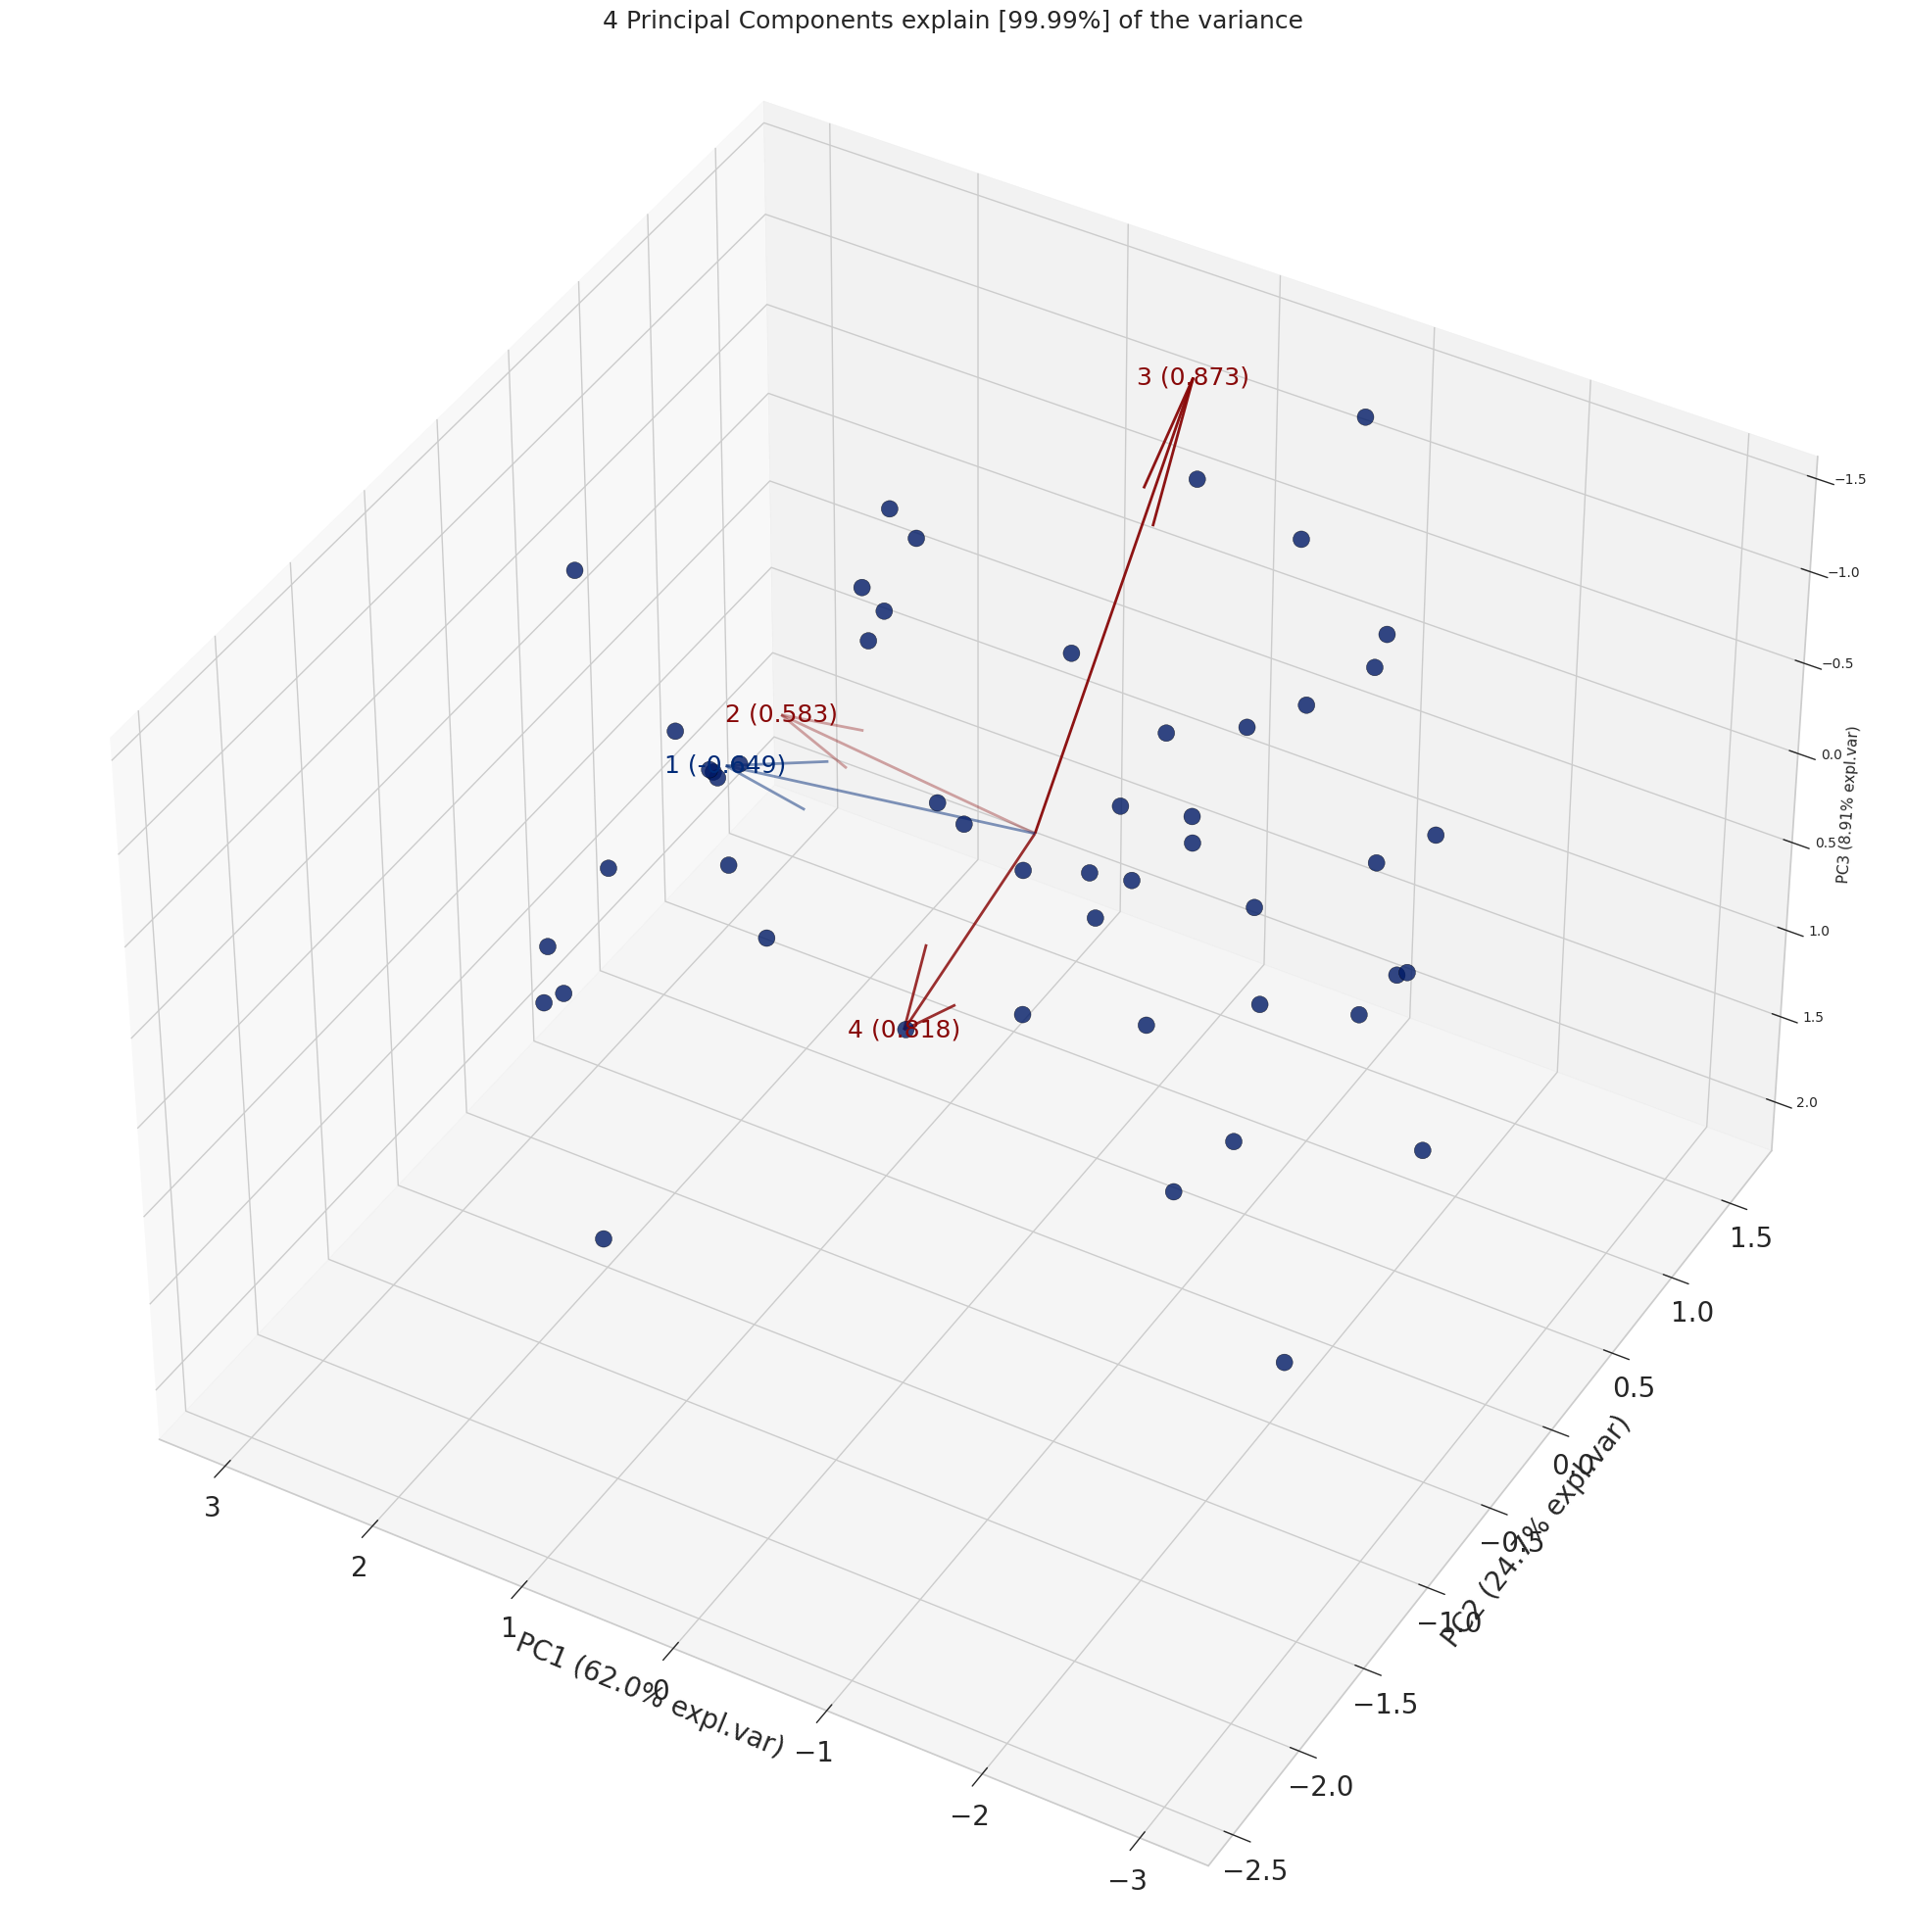

In [69]:
fig, ax = model.biplot3d(n_feat=4)